In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle as p
import networkx as nx
import matplotlib.pyplot as plt
from ActorNetwork import ActorNetwork
import time

In [2]:
file_path = 'data/pkl/an.pkl' # Replace with your actual file path

# Open the file in read-binary mode ('rb')
with open(file_path, 'rb') as file:
    # Use pickle.load() to deserialize the data
    data = p.load(file)

In [3]:
data

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
def compute_depths(parent, root):
    depth = {root: 0}

    def dfs(u):
        for v, p in parent.items():
            if p == u:
                depth[v] = depth[u] + 1
                dfs(v)

    dfs(root)
    return depth


def visualize_dfs_tree(parent, root):
    T = nx.DiGraph()

    # build DFS tree from parent pointers
    for node, par in parent.items():
        if par is not None:
            T.add_edge(par, node)

    depth = compute_depths(parent, root)

    # manual tree layout
    pos = {}
    x = 0
    for node in sorted(depth, key=lambda v: depth[v]):
        pos[node] = (x, -depth[node])
        x += 1

    plt.figure(figsize=(16, 6))
    nx.draw(
        T,
        pos,
        with_labels=False,
        node_size=700,
        font_size=8,
        arrows=False
    )
    plt.title(f"DFS Tree rooted at {root}")
    plt.show()


0.1052849292755127


/Applications/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


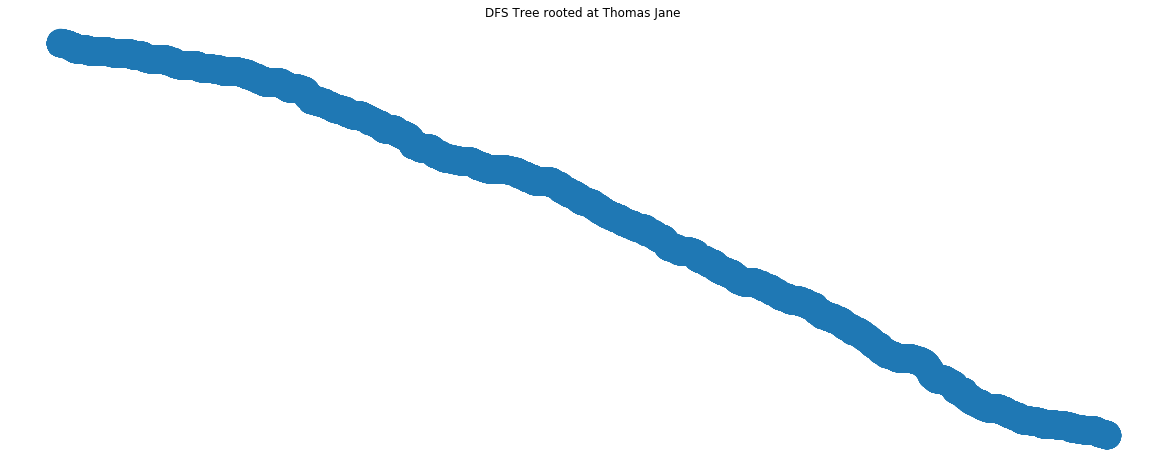

In [5]:
an=data
parent = an.DFS("Thomas Jane")
visualize_dfs_tree(parent, "Thomas Jane")

In [6]:
s=0
res = []
for key,val in an.costars.items():
    
    s+=len(val)
    res.append(len(val))

    
    
    

In [7]:
s

2863375

In [8]:
s/len(an.costars)

120.01236430697011

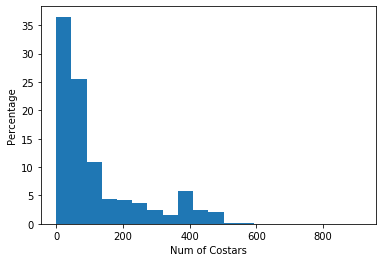

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = res

weights = np.ones(len(data)) / len(data) * 100

plt.hist(data, bins=20, weights=weights)
plt.xlabel("Num of Costars")
plt.ylabel("Percentage")
plt.show()



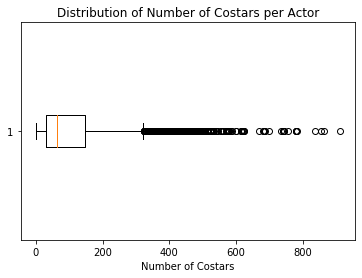

In [10]:
import matplotlib.pyplot as plt

data = res

plt.boxplot(data, vert=False, showfliers=True)
plt.xlabel("Number of Costars")
plt.title("Distribution of Number of Costars per Actor")
plt.show()



In [11]:
class Vis:
    def __init__(self,an):
        self.an = an
        self.res=self._degree()
    def _degree(self):
        
        res = []
        for key,val in self.an.costars.items():
            res.append(len(val))

        return res

    def hist(self):
        data = self.res

        weights = np.ones(len(data)) / len(data) * 100
        
        plt.hist(data, bins=20, weights=weights)
        plt.xlabel("Num of Costars")
        plt.ylabel("Percentage")
        plt.show()

    def boxWhisker(self):
        data = self.res

        plt.boxplot(data, vert=False, showfliers=True)
        plt.xlabel("Number of Costars")
        plt.title("Distribution of Number of Costars per Actor")
        plt.show()
            

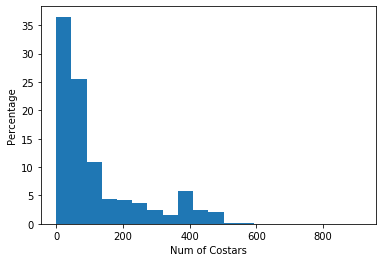

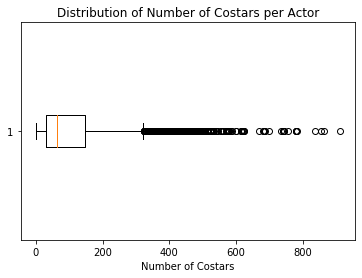

In [12]:
v = Vis(an)

v.res
v.hist()
v.boxWhisker()

In [13]:
def build_adjacency_matrix_from_network(an):
    actors = list(an.costars.keys())
    n = len(actors)

    actor_to_index = {actors[i]: i for i in range(n)}
    A = np.zeros((n, n), dtype=int)

    for actor, neighbors in an.costars.items():
        i = actor_to_index[actor]
        for neighbor in neighbors:
            j = actor_to_index[neighbor]
            A[i][j] = 1
            A[j][i] = 1

    return A, actor_to_index



In [14]:
A, index_map = build_adjacency_matrix_from_network(an)
print(A)
print(A.shape)

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(23859, 23859)


In [15]:
print(np.mean(A))
print(np.sum(A))
print(23859*23859)

0.005030066822036553
2863375
569251881


In [16]:
import sys
sys.getsizeof(A)
print(4554015160/(1e9))

4.55401516


In [17]:

from scipy import sparse
A_sparse = sparse.csr_matrix(A)

#print(A_sparse)
print(sys.getsizeof(A_sparse)/1e9)


6.4e-08


In [18]:
from collections import defaultdict

def build_movie_to_actors(an):
    """
    Create an adjacency list mapping movies to actors
    using the ActorNetwork object.
    """
    movie_to_actors = defaultdict(list)

    for actor, movies in an.movies.items():
        for movie in movies:
            movie_to_actors[movie].append(actor)

    return movie_to_actors


In [19]:
movie_adj = build_movie_to_actors(an)

print(len(movie_adj))
print(list(movie_adj.items())[:5])
#print(movie_adj.shape)

2000
[('tt0056404', ['Brigitte Bardot', 'Robert Hossein', 'Ursula Kubler', 'Christian Melsen', 'Christiane Rochefort', 'Jean-Marc Tennberg']), ('tt0054452', ['Brigitte Bardot', 'Christiane Rochefort', 'Paul Apoteker', 'Simone Berthier', 'Véra Clouzot', 'Arlette Gleize', 'Jean Houbé', 'Christian Lude', 'Raymond Meunier', 'Jean-Loup Reynold', 'Jackie Sardou', 'Suzy Willy', 'Juanito Tremble']), ('tt0057345', ['Brigitte Bardot', 'Jack Palance', 'Piero Piccioni', 'Giorgia Moll', 'Alberto Moravia', 'Michel Piccoli', 'William Robert Sivel']), ('tt0049189', ['Brigitte Bardot', 'Isabelle Corey', 'Paul Faivre', 'Marie Glory', 'Philippe Grenier', 'Jane Marken', 'Christian Marquand', 'Jany Mourey', 'Jacqueline Ventura', 'André Toscano']), ('tt0098439', ['Jack Palance', "Richard 'Dub' Wright", 'Jerry Martinez', 'John Walter Davis', 'Larry L. Fuentes', 'David Byrd', 'Clyde Smith', 'Michael Been', 'Alphonse Walter'])]


In [20]:
#this new dictionary does not represent the same graph as our old movies dictionary because this new dict has the movie --> actors while 
#the other movie dict actors to movies



In [21]:
import numpy as np

# def build_bipartite_matrix(movie_to_actors):
#     """
#     Build a bipartite adjacency (incidence) matrix B using numpy.

#     Rows: actors
#     Cols: movies
#     B[i, j] = 1 if actor i appears in movie j else 0

#     Returns:
#         B (np.ndarray), actor_to_index (dict), movie_to_index (dict)
#     """
    #actors = list(movie_to_actors.values())
    # movies = list(movie_to_actors.keys())
    # import pdb; pdb.set_trace()
    # n = len(actors)+len(movies)
    
    # actor_to_index = {actors[i]: i+len(movies) for i in range(n)}
    # movie_to_index = {movies[i]: i for i in range(n)}
    # A = np.zeros((n, n), dtype=int)

    # index_to_actor = {value: key for key, value in actor_to_index.items()}
    # index_to_movie = {value: key for key, value in movie_to_index.items()}
    
    # actors_to_movie = {value: key for key, value in movie_to_actors.items()}
    # d3 = {**actors_to_movie, **movie_to_actors}
    
    # for actor, movie in an.costars.items():
        
    #     i = actor_to_index[actor]
    #     for neighbor in neighbors:
    #         j = actor_to_index[neighbor]
    #         A[i][j] = 1
    #         A[j][i] = 1

    # return A, actor_to_index



In [22]:
def build_bipartite_matrix(movie_to_actors):
    movie_to_actors= build_movie_to_actors(an)
    from collections import defaultdict
    
    actors_to_movie = defaultdict(set)
    
    for movie, actorset in movie_to_actors.items():
        for actor in actorset:
            actors_to_movie[actor].add(movie)
    
    actors = list(actors_to_movie.keys())
    movies = list(movie_to_actors.keys())
    num_movies = len(movies)
    num_actors = len(actors)
    n = num_movies + num_actors
    
    movie_to_index = {movies[i]: i for i in range(num_movies)}
    #print(actors[0])
    actor_to_index = {actors[i]: i + num_movies for i in range(num_actors)}
    
    index_to_movie = {i: movies[i] for i in range(num_movies)}
    index_to_actor = {i + num_movies: actors[i] for i in range(num_actors)}
    
    A = np.zeros((n, n), dtype=int)
    
    
    
    d3 = {**actors_to_movie, **movie_to_actors}
    index_dict = {}
    reverse_dict = {}
    for i, key in enumerate(d3.keys()):
        index_dict[i] = key
        reverse_dict[key] = i
    
    
    
    for v, N_v in d3.items():
        i = reverse_dict[v]
        for neighbor in N_v:
            j = reverse_dict[neighbor]
            A[i][j] = 1
            A[j][i] = 1
    return A, actor_to_index, movie_to_index


In [23]:
#d3
# print(n)
# print(d3["tt0074851"])
# print(len(d3))
# print(len(actors_to_movie))
# print(len(movie_to_actors))
#print(index_dict)
A.shape
A.mean()


from scipy import sparse
A_sparse = sparse.csr_matrix(A)

#print(A_sparse)
print(sys.getsizeof(A_sparse)/1e9)

6.4e-08


In [24]:
movie_adj = build_movie_to_actors(an)          # from your earlier step
B, actor_idx, movie_idx = build_bipartite_matrix(movie_adj)

#print(B.shape)   # (#actors, #movies)
#print(B)

In [25]:
import sys
import numpy as np
from collections import deque

def deep_getsizeof(obj, seen=None):
    """Recursively measure memory usage of Python objects."""
    if seen is None:
        seen = set()

    obj_id = id(obj)
    if obj_id in seen:
        return 0
    seen.add(obj_id)

    size = sys.getsizeof(obj)

    if isinstance(obj, dict):
        size += sum(deep_getsizeof(k, seen) + deep_getsizeof(v, seen)
                    for k, v in obj.items())
    elif isinstance(obj, (list, tuple, set, frozenset, deque)):
        size += sum(deep_getsizeof(i, seen) for i in obj)

    return size


In [26]:
costars_adj_list_mem = deep_getsizeof(an.costars)
print("Costars adjacency list (bytes):", costars_adj_list_mem)
#2

Costars adjacency list (bytes): 187424965


In [27]:
costars_adj_matrix_mem = A.nbytes
print("Costars adjacency matrix (bytes):", costars_adj_matrix_mem)
#largest 4 because it contains all edges unlike the bipartite which can be divided into two disjoint and independent sets (which is why it is faster)

Costars adjacency matrix (bytes): 4554015048


In [28]:
bipartite_adj_list_mem = deep_getsizeof(movie_adj)
print("Bipartite adjacency list (bytes):", bipartite_adj_list_mem)
#smallest 1

Bipartite adjacency list (bytes): 2161474


In [29]:
bipartite_adj_matrix_mem = B.nbytes
print("Bipartite adjacency matrix (bytes):", bipartite_adj_matrix_mem)
#3

Bipartite adjacency matrix (bytes): 5349089312


In [30]:
# prActor = pageRank(A)
# actorRankDict = dict((,prActor))

# pr_bip = pageRank(B)
# bip_pagerank = dict((, pr_bip))



In [31]:
import numpy as np
import time

def page_rank(adj_matrix, damping=0.85, tol=1e-8, max_iter=100):
    """
    Compute PageRank from an adjacency matrix by hand.
    """
    n = adj_matrix.shape[0]

    # Convert to float
    A = adj_matrix.astype(float)

    # Handle dangling nodes (rows with all zeros)
    row_sums = A.sum(axis=1)
    for i in range(n):
        if row_sums[i] == 0:
            A[i] = np.ones(n) / n

    # Row-normalize
    A = A / A.sum(axis=1, keepdims=True)

    # Transition matrix (note transpose)
    M = A.T

    # Initialize PageRank vector
    pr = np.ones(n) / n
    teleport = np.ones(n) / n

    for _ in range(max_iter):
        new_pr = damping * (M @ pr) + (1 - damping) * teleport

        if np.linalg.norm(new_pr - pr, 1) < tol:
            break

        pr = new_pr

    return pr


In [32]:
# start = time.time()
#actors_pr_vector = page_rank(actors_adj_matrix)
# actors_runtime = time.time() - start

# actors_pagerank = dict(zip(actors, actors_pr_vector))


In [33]:
#2b
import time
import sys
import numpy as np
import networkx as nx
import igraph as ig

# ---------------------------
# NetworkX: Actor graph
# ---------------------------
t0 = time.time()

G_actors_nx = nx.from_numpy_array(A)
G_actors_nx = nx.relabel_nodes(
    G_actors_nx,
    {i: actors_list[i] for i in range(len(actors_list))}
)

build_time_actors_nx = time.time() - t0


# ---------------------------
# NetworkX: Bipartite graph
# ---------------------------
t0 = time.time()

G_bipartite_nx = nx.from_numpy_array(bipartite_adj_matrix)
G_bipartite_nx = nx.relabel_nodes(
    G_bipartite_nx,
    {i: bipartite_nodes_list[i] for i in range(len(bipartite_nodes_list))}
)

build_time_bipartite_nx = time.time() - t0


NameError: name 'actors_list' is not defined

In [ ]:
# ---------------------------
# PageRank: Actor graph (NX)
# ---------------------------
t0 = time.time()
pagerank_actors_nx = nx.pageRank(G_actors_nx, alpha=0.85)
pagerank_time_actors_nx = time.time() - t0


# ---------------------------
# PageRank: Bipartite graph (NX)
# ---------------------------
t0 = time.time()
pagerank_bipartite_nx = nx.pageRank(G_bipartite_nx, alpha=0.85)
pagerank_time_bipartite_nx = time.time() - t0


In [ ]:
size_actors_nx = sys.getsizeof(G_actors_nx)
size_bipartite_nx = sys.getsizeof(G_bipartite_nx)


In [ ]:
# Save results explicitly
nx_results = {
    "actors_pagerank": pagerank_actors_nx,              # dict[str, float]
    "bipartite_pagerank": pagerank_bipartite_nx,        # dict[str, float]
    "actors_runtime": pagerank_time_actors_nx,
    "bipartite_runtime": pagerank_time_bipartite_nx,
    "actors_build_time": build_time_actors_nx,
    "bipartite_build_time": build_time_bipartite_nx,
    "actors_size_bytes": size_actors_nx,
    "bipartite_size_bytes": size_bipartite_nx,
}

# Delete graph objects
del G_actors_nx
del G_bipartite_nx


In [ ]:
#2c
# ---------------------------
# igraph: Actor graph
# ---------------------------
t0 = time.time()

G_actors_ig = ig.Graph.Adjacency(
    (actors_adj_matrix > 0).tolist(),
    mode="UNDIRECTED"
)
G_actors_ig.vs["name"] = actors_list

build_time_actors_ig = time.time() - t0


# ---------------------------
# igraph: Bipartite graph
# ---------------------------
t0 = time.time()

G_bipartite_ig = ig.Graph.Adjacency(
    (bipartite_adj_matrix > 0).tolist(),
    mode="UNDIRECTED"
)
G_bipartite_ig.vs["name"] = bipartite_nodes_list

build_time_bipartite_ig = time.time() - t0


In [ ]:
# ---------------------------
# PageRank: Actor graph (igraph)
# ---------------------------
t0 = time.time()
pr_actors_vals = G_actors_ig.pageRank(damping=0.85)
pagerank_time_actors_ig = time.time() - t0

pagerank_actors_ig = {
    name: score
    for name, score in zip(G_actors_ig.vs["name"], pr_actors_vals)
}


# ---------------------------
# PageRank: Bipartite graph (igraph)
# ---------------------------
t0 = time.time()
pr_bipartite_vals = G_bipartite_ig.pageRank(damping=0.85)
pagerank_time_bipartite_ig = time.time() - t0

pagerank_bipartite_ig = {
    name: score
    for name, score in zip(G_bipartite_ig.vs["name"], pr_bipartite_vals)
}



In [ ]:
size_actors_ig = sys.getsizeof(G_actors_ig)
size_bipartite_ig = sys.getsizeof(G_bipartite_ig)


In [ ]:
igraph_results = {
    "actors_pagerank": pagerank_actors_ig,               # dict[str, float]
    "bipartite_pagerank": pagerank_bipartite_ig,         # dict[str, float]
    "actors_runtime": pagerank_time_actors_ig,
    "bipartite_runtime": pagerank_time_bipartite_ig,
    "actors_build_time": build_time_actors_ig,
    "bipartite_build_time": build_time_bipartite_ig,
    "actors_size_bytes": size_actors_ig,
    "bipartite_size_bytes": size_bipartite_ig,
}

del G_actors_ig
del G_bipartite_ig


In [ ]:
# -----------------------------
# SPEED FIX: Filter IMDb early
# -----------------------------

# Compute year window from Criterion
min_year = int(crit["year"].min()) - 2
max_year = int(crit["year"].max()) + 2
print("Filtering IMDb to years:", min_year, "–", max_year)

# -----------------------------
# Load IMDb BASICS (filtered)
# -----------------------------
basics = pd.read_csv(
    "data/title.basics.tsv",
    sep="\t",
    dtype=str,
    na_values="\\N",
    usecols=["tconst", "titleType", "primaryTitle", "originalTitle", "startYear"]
)

basics = basics[basics["titleType"].isin(["movie", "tvMovie"])].copy()
basics["startYear"] = pd.to_numeric(basics["startYear"], errors="coerce")

basics = basics[
    (basics["startYear"] >= min_year) &
    (basics["startYear"] <= max_year)
].copy()

basics["primary_norm"] = basics["primaryTitle"].map(norm)
basics["original_norm"] = basics["originalTitle"].map(norm)

print("IMDb basics rows after filter:", len(basics))

# -----------------------------
# Load IMDb AKAS (filtered)
# -----------------------------
akas = pd.read_csv(
    "data/title.akas.tsv",
    sep="\t",
    dtype=str,
    na_values="\\N",
    usecols=["titleId", "title"]
)

akas = akas[akas["titleId"].isin(set(basics["tconst"]))].copy()
akas["aka_norm"] = akas["title"].map(norm)

print("IMDb akas rows after filter:", len(akas))

# -----------------------------
# Load CREW + NAMES (unchanged)
# -----------------------------
crew = pd.read_csv("data/title.crew.tsv", sep="\t", dtype=str, na_values="\\N")
names = pd.read_csv("data/name.basics.tsv", sep="\t", dtype=str, na_values="\\N")

names["name_norm"] = names["primaryName"].map(norm)
name_map = dict(zip(names["nconst"], names["name_norm"]))

# Build tconst → directors map
director_map = {}
crew["directors"] = crew["directors"].fillna("")
for tconst, dstr in zip(crew["tconst"], crew["directors"]):
    director_map[tconst] = [name_map[d] for d in dstr.split(",") if d in name_map]

# -----------------------------
# FAST Title Index Construction
# -----------------------------
title_index = {}

def add(k, v):
    if k:
        title_index.setdefault(k, set()).add(v)

# Primary + original titles
for t, tc in zip(basics["primary_norm"], basics["tconst"]):
    add(t, tc)

for t, tc in zip(basics["original_norm"], basics["tconst"]):
    add(t, tc)

# Alternate titles
for t, tc in zip(akas["aka_norm"], akas["titleId"]):
    add(t, tc)

print("Title index size:", len(title_index))



In [ ]:
# ============================================================
# FINAL MATCHING BLOCK (SAFE, CORRECT, ONE-ID-PER-MOVIE)
# ============================================================

# Ensure a stable unique ID for every Criterion row
crit = crit.reset_index(drop=True)
crit["criterion_id"] = crit.index.astype(int)

auto = []
review = []

basics_idx = basics.set_index("tconst", drop=False)

def score_match(crow, brow):
    # title similarity
    ts = max(
        fuzz.token_sort_ratio(crow["title_norm"], brow["primary_norm"]),
        fuzz.token_sort_ratio(crow["title_norm"], brow["original_norm"]),
    )

    # year penalty
    if pd.isna(crow["year"]) or pd.isna(brow["startYear"]):
        yp = 10
    else:
        d = abs(int(crow["year"]) - int(brow["startYear"]))
        yp = 0 if d == 0 else 6 if d == 1 else 18 if d == 2 else 35

    # director bonus
    db = 0
    imdb_dirs = director_map.get(brow["tconst"], [])
    if crow["director_norms"] and imdb_dirs:
        best = 0
        for cd in crow["director_norms"]:
            for idn in imdb_dirs:
                best = max(best, fuzz.token_sort_ratio(cd, idn))
        if best >= 90:
            db = 12
        elif best >= 80:
            db = 7

    return ts - yp + db


# ----------------------------
# First pass: strict matching
# ----------------------------
for _, crow in crit.iterrows():
    cands = title_index.get(crow["title_norm"], set())

    if not cands:
        review.append({
            "criterion_id": crow["criterion_id"],
            "spine": crow["spine"],
            "criterion_title": crow["title"],
            "criterion_year": crow["year"],
            "criterion_director": crow["director"],
            "criterion_country": crow["country"],
            "reason": "no title candidates"
        })
        continue

    sub = basics_idx.loc[basics_idx.index.intersection(cands)].copy()

    if pd.notna(crow["year"]):
        sub = sub[sub["startYear"].between(crow["year"] - 2, crow["year"] + 2)]

    if sub.empty:
        review.append({
            "criterion_id": crow["criterion_id"],
            "spine": crow["spine"],
            "criterion_title": crow["title"],
            "criterion_year": crow["year"],
            "criterion_director": crow["director"],
            "criterion_country": crow["country"],
            "reason": "year window removed all"
        })
        continue

    sub["score"] = sub.apply(lambda r: score_match(crow, r), axis=1)
    sub = sub.sort_values("score", ascending=False)

    top = sub.iloc[0]
    second = sub.iloc[1]["score"] if len(sub) > 1 else -999

    if top["score"] >= 88 and (top["score"] - second) >= 6:
        auto.append({
            "criterion_id": crow["criterion_id"],
            "spine": crow["spine"],
            "criterion_title": crow["title"],
            "criterion_year": crow["year"],
            "criterion_director": crow["director"],
            "criterion_country": crow["country"],
            "imdb_tconst": top["tconst"],
            "imdb_primaryTitle": top["primaryTitle"],
            "imdb_startYear": top["startYear"],
            "match_score": float(top["score"]),
            "match_method": "auto"
        })
    else:
        review.append({
            "criterion_id": crow["criterion_id"],
            "spine": crow["spine"],
            "criterion_title": crow["title"],
            "criterion_year": crow["year"],
            "criterion_director": crow["director"],
            "criterion_country": crow["country"],
            "reason": "ambiguous_or_low_confidence"
        })


auto_df = pd.DataFrame(auto)
review_df = pd.DataFrame(review)

print("Auto matched:", len(auto_df))
print("Needs review:", len(review_df))


# ----------------------------
# Second pass: looser rules
# ----------------------------
final_rows = {row["criterion_id"]: row for row in auto_df.to_dict("records")}

for _, crow in crit[crit["criterion_id"].isin(set(review_df["criterion_id"]))].iterrows():
    cands = title_index.get(crow["title_norm"], set())
    if not cands:
        continue

    sub = basics_idx.loc[basics_idx.index.intersection(cands)].copy()

    if pd.notna(crow["year"]):
        sub = sub[sub["startYear"].between(crow["year"] - 5, crow["year"] + 5)]

    if sub.empty:
        continue

    sub["score"] = sub.apply(lambda r: score_match(crow, r), axis=1)
    sub = sub.sort_values("score", ascending=False)

    top = sub.iloc[0]

    if top["score"] >= 92:
        final_rows[crow["criterion_id"]] = {
            "criterion_id": crow["criterion_id"],
            "spine": crow["spine"],
            "criterion_title": crow["title"],
            "criterion_year": crow["year"],
            "criterion_director": crow["director"],
            "criterion_country": crow["country"],
            "imdb_tconst": top["tconst"],
            "imdb_primaryTitle": top["primaryTitle"],
            "imdb_startYear": top["startYear"],
            "match_score": float(top["score"]),
            "match_method": "second_pass"
        }


# ----------------------------
# Final outputs
# ----------------------------
final_df = pd.DataFrame(list(final_rows.values())).sort_values("criterion_id")

final_df.to_csv("criterion_imdb_ids_final.csv", index=False)
auto_df.to_csv("criterion_imdb_ids_auto.csv", index=False)
review_df.to_csv("criterion_imdb_ids_review.csv", index=False)

print("Final matched:", len(final_df), "out of", len(crit))

unmatched = set(crit["criterion_id"]) - set(final_df["criterion_id"])
print("Unmatched criterion_id count:", len(unmatched))


In [ ]:
# ============================================================
# PART B: MAP EACH CRITERION MOVIE TO ITS ACTORS
# ============================================================

# Load IMDb principals and names
principals = pd.read_csv(
    "data/title.principals.tsv",
    sep="\t",
    na_values="\\N",
    dtype=str
)

names = pd.read_csv(
    "data/name.basics.tsv",
    sep="\t",
    na_values="\\N",
    dtype=str,
    usecols=["nconst", "primaryName"]
)

# Keep only acting roles
principals = principals[
    principals["category"].isin(["actor", "actress"])
]

# Join Criterion → IMDb principals
crit_principals = final_df.merge(
    principals,
    left_on="imdb_tconst",
    right_on="tconst",
    how="left"
)

# Attach human-readable actor names
crit_principals = crit_principals.merge(
    names,
    on="nconst",
    how="left"
)

# Build dictionary: criterion_id → set of actors
criterion_to_actors = (
    crit_principals
    .dropna(subset=["primaryName"])
    .groupby("criterion_id")["primaryName"]
    .apply(set)
    .to_dict()
)

print("Movies with at least 1 actor:",
      sum(len(v) > 0 for v in criterion_to_actors.values()),
      "out of", len(final_df))


In [ ]:
crit_principals


In [ ]:
#part 3c
import pickle
from collections import defaultdict, deque

# ============================================================
# ACTOR NETWORK
# ============================================================

actor_net = ActorNetwork()

for movie_id, actors in criterion_to_actors.items():
    # addMovie expects a deque
    if len(actors) > 1:
        actor_net.addMovie(movie_id, deque(actors))

print("Actors:", actor_net.getNumActors())
print("Connections:", actor_net.getNumConnections())

# ============================================================
# BIPARTITE GRAPH
# (explicit two-mode structure)
# ============================================================

bipartite_graph = {
    "movie_to_actors": defaultdict(set),
    "actor_to_movies": defaultdict(set)
}

for movie_id, actors in criterion_to_actors.items():
    for actor in actors:
        bipartite_graph["movie_to_actors"][movie_id].add(actor)
        bipartite_graph["actor_to_movies"][actor].add(movie_id)

print("Movies:", len(bipartite_graph["movie_to_actors"]))
print("Actors:", len(bipartite_graph["actor_to_movies"]))

# ============================================================
# PICKLE OBJECTS
# ============================================================

with open("data/pkl/criterion_actor_network.pkl", "wb") as f:
    pickle.dump(actor_net, f)

with open("data/pkl/criterion_bipartite_graph.pkl", "wb") as f:
    pickle.dump(bipartite_graph, f)

print("Wrote:")
print(" - data/pkl/criterion_actor_network.pkl")
print(" - data/pkl/criterion_bipartite_graph.pkl")


In [ ]:
# ============================================================
# 4a
# ============================================================

def count_connected_components(actor_net):
    visited = set()
    components = 0

    for actor in actor_net.costars:
        if actor not in visited:
            # run DFS from this actor
            stack = [actor]
            visited.add(actor)

            while stack:
                u = stack.pop()
                for v in actor_net.costars[u]:
                    if v not in visited:
                        visited.add(v)
                        stack.append(v)

            components += 1

    return components


num_components = count_connected_components(actor_net)
print("Number of connected components:", num_components)


In [ ]:
import matplotlib.pyplot as plt

# ============================================================
# DEGREE SEQUENCE
# ============================================================

# Degree of each actor = number of costars
degrees = [len(neighbors) for neighbors in actor_net.costars.values()]

print("Number of actors:", len(degrees))
print("Min degree:", min(degrees))
print("Max degree:", max(degrees))
print("Average degree:", sum(degrees) / len(degrees))

# ============================================================
# HISTOGRAM OF NODE DEGREES
# ============================================================

plt.figure()
plt.hist(degrees, bins=50)
plt.xlabel("Node Degree (Number of Costars)")
plt.ylabel("Frequency")
plt.title("Actor Network Degree Histogram")
plt.show()

# ============================================================
# BOX AND WHISKER PLOT
# ============================================================

plt.figure()
plt.boxplot(degrees, vert=False,showfliers=True)
plt.ylabel("Node Degree (Number of Costars)")
plt.title("Actor Network Degree Distribution")
plt.show()


In [ ]:
#entropy 1
import math
from collections import Counter
from typing import Iterable, Any

def entropy_probs(p, base=2.0):
    H = 0.0
    for pi in p:
        if pi > 0:
            H -= pi * (math.log(pi) / math.log(base))
    return H

#sample entropy
# def entropy(x: Iterable[Any], base: float = 2.0) -> float:
#     """
#     Compute Shannon entropy H(X) of the empirical distribution of values in x.

#     Parameters
#     ----------
#     x : iterable
#         1-D data (list/tuple/numpy array/pandas Series). Values may repeat.
#     base : float
#         Logarithm base. base=2 gives bits, base=math.e gives nats.

#     Returns
#     -------
#     float
#         Shannon entropy.

#     Notes
#     -----
#     H(X) = - Σ p_i log_base(p_i)
#     where p_i are frequencies / n for each distinct value.
#     """
#     x = list(x)
#     n = len(x)
#     if n == 0:
#         raise ValueError("entropy() requires at least one element")

#     counts = Counter(x)
#     inv_n = 1.0 / n

#     H = 0.0
#     for c in counts.values():
#         p = c * inv_n
#         # p is never 0 here, since c>=1, so log is safe.
#         H -= p * (math.log(p) / math.log(base))
#     return H


In [ ]:
entropy_probs([1, 0, 0])

In [ ]:
entropy_probs([0, 1, 0])

In [ ]:
entropy_probs([1/3, 1/3, 1/3])

In [ ]:
entropy_probs([1/8, 1/8, 6/8])
#What is this entropy measuring? - It is measuring the certainty on a single draw from this distribution


In [ ]:
#1 part 2
import math
import numpy as np

# Define the four probability vectors
P = [
    np.array([1.0, 0.0, 0.0]),
    np.array([0.0, 1.0, 0.0]),
    np.array([1/3, 1/3, 1/3]),
    np.array([1/4, 1/4, 1/2]),
]

labels = ["p1=[1,0,0]", "p2=[0,1,0]", "p3=[1/3,1/3,1/3]", "p4=[1/4,1/4,1/2]"]

def cross_entropy(p, q, base=2):
    """
    Cross-entropy H(p, q) = - sum_i p_i log q_i
    Returns inf if q assigns zero probability where p > 0.
    """
    H = 0.0
    for pi, qi in zip(p, q):
        if pi == 0:
            continue
        if qi == 0:
            return math.inf
        H -= pi * (math.log(qi) / math.log(base))
    return H

# Build the 4x4 table
table = np.zeros((4, 4), dtype=float)

for i in range(4):
    for j in range(4):
        table[i, j] = cross_entropy(P[i], P[j])

# Pretty print
print("Cross-Entropy Table (bits)\n")
print(" " * 18 + "  ".join(f"{lbl:>18}" for lbl in labels))
for i, row in enumerate(table):
    row_str = []
    for val in row:
        if math.isinf(val):
            row_str.append(f"{'inf':>18}")
        else:
            row_str.append(f"{val:18.3f}")
    print(f"{labels[i]:>18}  " + "  ".join(row_str))


In [36]:
#1 part 3
from collections import defaultdict

def invert_movies(a_to_m):
    """
    Returns a dict mapping:
        movie -> set of actors
    """
    movie_to_actors = defaultdict(set)

    for actor, movies in an.movies.items():
        for movie in movies:
            movie_to_actors[movie].add(actor)

    return movie_to_actors


In [37]:
def jaccard_similarity(A, B):
    """
    A, B: sets
    returns J(A,B) = |A ∩ B| / |A ∪ B|
    """
    if not A and not B:
        return 1.0  # convention
    return len(A & B) / len(A | B)


In [38]:
movie_to_actors = invert_movies(an.movies)

A = d3["Brigitte Bardot"]
B = d3["Jack Palance"]

sim = jaccard_similarity(A, B)
print(sim)

NameError: name 'd3' is not defined

In [ ]:
print(A)
print(B)

In [ ]:
d3